<a href="https://colab.research.google.com/github/wellia/kaggles/blob/main/data_explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT742: Modern Data Science 
**(2020 Assessment Task 01: Exploration for Data Scientists Survey Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Wellia Lioeng
- Student ID:  220093302
- Email:  wlioeng@deakin.edu.au
- Lab Session and Tutor (for on campus students): Prc01 and LI, Gang

---

## Overview

In 2017, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) conducted a survey on a large range of users registered as the data scientist in their platform. The survey data are broadly covered the skill set of the data scientists, the demographic of the data scientists, the feedback of the platform and many other information. 

In this task, you will need to 

- **Part 1**: Given the following two data sets, you are required to finish some required analysis, with the exploreation data analytics skills as well as visuilization skills
     - [MCQResponses.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv): Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.     
     - [ConversionRates.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv): Currency conversion rates to USD. 
- **Part 2**: Given the following data set, you are required to find out top keywords for hiring the data scientists. 
    - [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv): Data scientists job advertising in US with job descriptions, from JobPikr.


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## Part 1 - What we could know about the Data Scientists? 

*1.0*. Libraries and data files
<a id="Load data"></a>
***


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=9be3e5f4b80b7d1aa148b63aeba1ec181fd7a189a1bd396c6f2c1a60c9102862
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import wget
import seaborn as sns # you can use other packages such as matplotlib too
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
link_to_data = 'https://github.com/wellia/kaggles/train.csv'
train_data = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv'
DataSet = wget.download(link_to_data)

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load MCQResponses.csv into dataframe df_demog, and check the data statistics and general infommation by printing its top 5 rows.
</div>

In [ ]:
# Read data and display the top 5

df_demog =  pd.read_csv("MCQResponses.csv")
df_demog.head()

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
0,Male,United States,56,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,University courses,250000.0,USD,10 - Highly Satisfied
1,Female,Australia,43,Employed full-time,Yes,Business Analyst,Fine,Employed by non-profit or NGO,Microsoft Excel Data Mining,Link Analysis,Python,Bachelor's degree,NaN,Work,80000.0,AUD,7
2,Male,Russia,33,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,C/C++,Deep learning,Python,Bachelor's degree,Other,Self-taught,1200000.0,RUB,7
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
4,Male,Taiwan,26,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",1100000.0,TWD,5


<div class="alert alert-block alert-info">

**Code**: 
    Check which columns have NAs (don't remove them now), and for each of those columns, display how many records with values (namely, no NULL values)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.A** Please include your result for this coding task into your report, with proper section title '1.0.A'.
</div>
    </div>




In [ ]:
# Columns with NAs
null_columns = df_demog.columns[df_demog.isnull().any()]

In [ ]:
# Count records of columns that contain NAs
df_demog[null_columns].notnull().sum()

TitleFit                        4251
CurrentEmployerType             4275
MLToolNextYearSelect            4206
MLMethodNextYearSelect          4170
LanguageRecommendationSelect    4228
MajorSelect                     3952
FirstTrainingSelect             4324
JobSatisfaction                 4317
dtype: int64

<div class="alert alert-block alert-info">

**Code**: 
    Select the users whose current job title is 'Data Scientist', and store into variable df_demog_ds    

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.B** Please include your result of `how many Data Scientists?' into your report, with proper section title  '1.0.B'.
</div>
</div>




In [ ]:
# Count number of Data Scientist
df_demog_ds = df_demog.loc[df_demog['CurrentJobTitleSelect'] == 'Data Scientist']
print('There are %i numbers of Data Scientist in the survey' % len(df_demog_ds))


There are 1263 numbers of Data Scientist in the survey


### 1.1. Education
<a id="education"></a>
***
In data scientists job, education is important. Is it reasonable to ask data scientists to have a Master's or Doctoral degree? Let's find out. 


<div class="alert alert-block alert-info">

**Code**: 
    Plot and display as text output the number and percentage of data scientist with each type of formal education. 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1** Please include your running result of this coding task into your report, with proper section title  '1.1'.
</div>
</div>

There are 635 data scientists with Master's degree (50 % from the total data scientist)
There are 326 data scientists with Doctoral degree (25 % from the total data scientist)


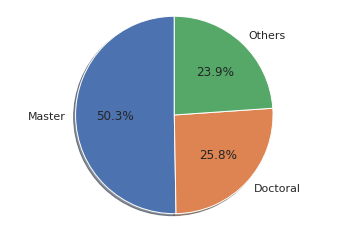

In [ ]:
# Number and percentage of data scientist with each type of formal education
total_data_scientist = len(df_demog_ds)
number_of_master = len(df_demog_ds.loc[df_demog['FormalEducation']=='Master\'s degree'])
number_of_doctoral = len(df_demog_ds.loc[df_demog['FormalEducation']=='Doctoral degree'])

print('There are %i data scientists with Master\'s degree (%i %% from the total data scientist)' % (number_of_master, number_of_master/total_data_scientist*100))
print('There are %i data scientists with Doctoral degree (%i %% from the total data scientist)' % (number_of_doctoral, number_of_doctoral/total_data_scientist*100))

number_of_others = total_data_scientist - number_of_master - number_of_doctoral
labels = 'Master', 'Doctoral', 'Others'
sizes = [number_of_master, number_of_doctoral, number_of_others]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

1.2. Salary
<a id="salary"></a>

Data science is considered a very well paying role, let's find out the salary information. Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. We have filtered the data for you and provided exchange rates in a file called *ConversionRates.csv* which should already be imported. 

First of all, you need to merge the multiple choice data with the *ConversionRates.csv* by using the compensation currency and originCountry respectively. And then you will need to multiply the compensation amount with exchangeRateAUS to have the Australian dollors.

In [ ]:
# Read file, merge exchangeRate, calculate salary in Australian dollars
df_conversion_rates =  pd.read_csv("ConversionRates.csv")

df_salary = pd.merge(left=df_demog_ds[['CompensationAmount','CompensationCurrency']], right=df_conversion_rates[['originCountry','exchangeRate']], left_on='CompensationCurrency', right_on='originCountry')

# convert to USD
df_salary['salaryInUSD'] = round(df_salary ['CompensationAmount'] * df_salary ['exchangeRate'], 2)

# convert to AUD
rateUSD_AUD = df_conversion_rates[df_conversion_rates.originCountry == 'AUD'].exchangeRate
rateUSD_AUD = rateUSD_AUD.iloc[0]
df_salary['salaryInAUD'] = df_salary['salaryInUSD']/rateUSD_AUD


<div class="alert alert-block alert-info">

**Code**: 
Use the codes for each country to merge the files so that you can convert the salary data to Australian Dollars (AUD). Print out the maximum and median salary in AUD. Hint: think about what data type you have.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.A** In your report's section '1.2.A', answer what is the maximum and the median salary in AUD (this is for all respondents). 
</div>
</div>


In [ ]:
# Calculate maximum and median salary all countries in AUD
 max_salary = df_salary["salaryInAUD"].max()
 md_salary = df_salary['salaryInAUD'].median()
 print('Maximum salary in all countries is %.2f AUD and median salary in all countries is %.2f AUD' % (max_salary, md_salary))
 df_salary


Maximum salary in all countries is 742711.17 AUD and median salary in all countries is 88828.58 AUD


,CompensationAmount,CompensationCurrency,originCountry,exchangeRate,salaryInUSD,salaryInAUD
0,95000.0,INR,INR,0.015620,1483.90,1849.534469
1,120000.0,INR,INR,0.015620,1874.40,2336.254066
2,1200000.0,INR,INR,0.015620,18744.00,23362.540664
3,1300000.0,INR,INR,0.015620,20306.00,25309.419052
4,1400000.0,INR,INR,0.015620,21868.00,27256.297441
...,...,...,...,...,...,...
1257,3000000.0,KES,KES,0.009726,29178.00,36367.488876
1258,60000000.0,MGA,MGA,0.000338,20280.00,25277.012626
1259,36.0,JOD,JOD,1.410620,50.78,63.292244
1260,160000.0,HRK,HRK,0.160606,25696.96,32028.717079


<div class="alert alert-block alert-info">

**Code**: 
Plot a boxplot of the Australian respondents salary distribution. Print out the maximum and median salaries for Australian repsondnts.
   
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.B** In your report's section '1.2.B', answer what is the maximum and median salary in AUD for Australian respondents, and also include your plotted boxplot of this coding task into your report. 
</div>
</div>


In [ ]:
# Calculate maximum and median salary of Australian  respondents
df_salary_au = df_salary.loc[df_salary['originCountry'] == 'AUD']
max_salary_au = df_salary_au['CompensationAmount'].max()
md_salary_au = df_salary_au['CompensationAmount'].median()
min_salary_au = df_salary_au['CompensationAmount'].min()
print('Maximum salary in Australia is %.2f AUD, minimum is %.2f AUD and median salary is %.2f AUD' % (max_salary_au, min_salary_au, md_salary_au))


Maximum salary in Australia is 350000.00 AUD, minimum is 90.00 AUD and median salary is 143500.00 AUD


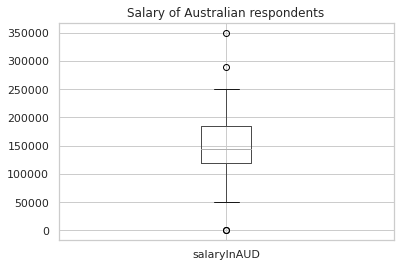

In [ ]:
# Boxplot of Australian respondents salary distribution
plt.title("Salary of Australian respondents")
boxplot = df_salary_au.boxplot(column='salaryInAUD')




<div class="alert alert-block alert-info">

**Code**: 
There are some outliers in the Australian salary plot. You are required to filter the salary of Australian respondents by removing any below 40,000 or above 250,000. 

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.C** In your report's section '1.2.C', answer what is the new maximum and median salary in AUD for Australian respondents after filtering, and also include your plotted boxplot of this coding task into your report. 
</div>
</div>


In [ ]:
# Filterout outliers
df_filtered_salary_au = df_salary_au[(df_salary_au.CompensationAmount >= 40000) & (df_salary_au.CompensationAmount <= 250000)]
max_salary_au = df_filtered_salary_au['CompensationAmount'].max()
md_salary_au = df_filtered_salary_au['CompensationAmount'].median()
min_salary_au = df_filtered_salary_au['CompensationAmount'].min()
print('After filtered, the maximum salary in Australia is %.2f AUD, minimum is %.2f AUD and the median salary is %.2f AUD' % (max_salary_au, min_salary_au, md_salary_au))


After filtered, the maximum salary in Australia is 250000.00 AUD, minimum is 50000.00 AUD and the median salary is 143500.00 AUD


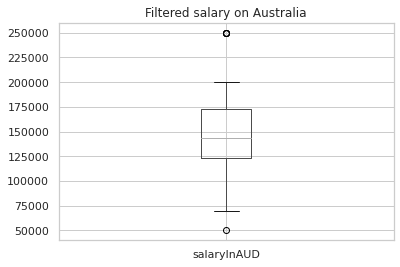

In [ ]:
# Boxplot Filtered Australian salary
plt.title("Filtered salary on Australia")
boxplot = df_filtered_salary_au.boxplot(column='salaryInAUD')


### 1.3. Exploring the data scientist Demographics

*   List item
*   List item


<a id="demographics"></a>
***

#### 1.3.1 Age
<a id="age"></a>
You will need to build a boxplot to explore the age of all data scientists. 
Your plot must have a label for each axis, a tittle and also show the outliers.

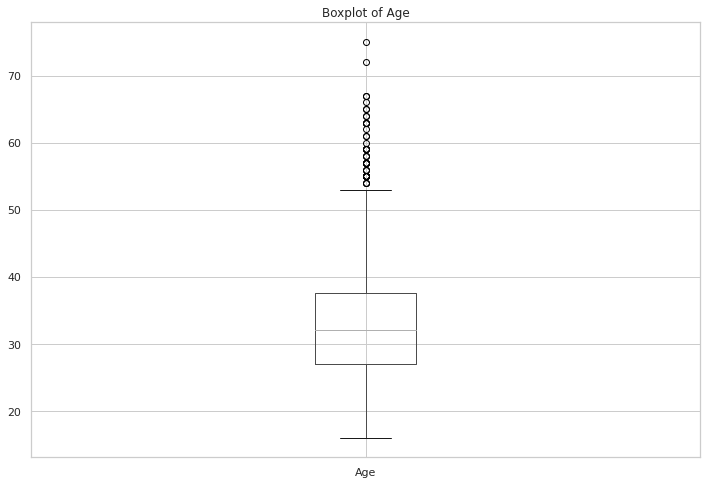

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Boxplot of Age")
boxplot = df_demog_ds.boxplot(column='Age')


<div class="alert alert-block alert-info">

**Code**: 
        <ol>
        <li> Calculate the five number summary descriptive statistics for age as shown on the boxplot, as well as the mean. Please round your mean to integer.</li>
        <li> Regardless of the errors that the data show, we are interested in working-age data scientists, how many aged between 24 and 60. </li>
        <li> How many respondents were under 18?</li>
    </ol>
    

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.A** In your report's section '1.3.A', answer 
        <ol>
        <li> What is the mean age of all data scientists? </li>
        <li> What is the median age of all data scientists? </li>
        <li> how many data scientists aged between 24 and 60</li>
        <li> how many respondents were under 18? </li>
    </ol>
</div>
</div>







In [ ]:
# Calculate the five number summary descriptive statistics for age
quartiles = np.percentile(df_demog_ds["Age"], [25, 50, 75])
data_min = df_demog_ds["Age"].min()
data_max = df_demog_ds["Age"].max()
# print 5-number summary
print('Min: %i' % data_min)
print('Q1: %i' % quartiles[0])
print('Median: %i' % quartiles[1])
print('Q3: %i' % quartiles[2])
print('Max: %i' % data_max)



Min: 16
Q1: 27
Median: 32
Q3: 37
Max: 75


In [ ]:
# Calculate mean
data_mean = round(df_demog_ds["Age"].mean())
data_mean


34

In [ ]:
# Count data scientist aged between 24 and 60
len(df_demog_ds[(df_demog_ds.Age >= 24) & (df_demog_ds.Age <= 60)])


1188

In [ ]:
# Your Code: how many respondents under 18?
len(df_demog_ds[df_demog_ds.Age < 18])


1

#### 1.3.2 Gender
<a id="gender"></a>
We are interested in the gender of respondents. Nowadays, the gender equity is important for companies and organizations. 


<div class="alert alert-block alert-info">

**Code**: 
Plot the gender distribution of the data scientist users using a bar chart. 
</div>


Text(0.5, 1.0, 'Bar chart of Gender')

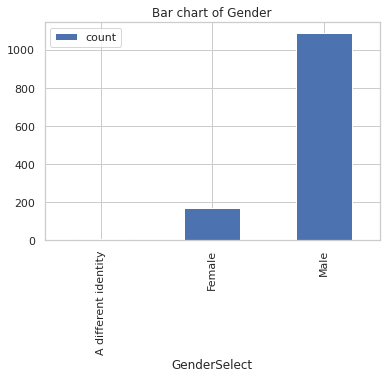

In [ ]:
df = pd.DataFrame({'count' : df_demog_ds.groupby(["GenderSelect"]).size()}).reset_index()
df.plot.bar(x='GenderSelect', y='count')
plt.title("Bar chart of Gender")

Now let's see if any relationship between gender and age

Create a box plot showing the age of all the data scientists according to gender (men, women and other identity).

Text(0.5, 0.98, '')

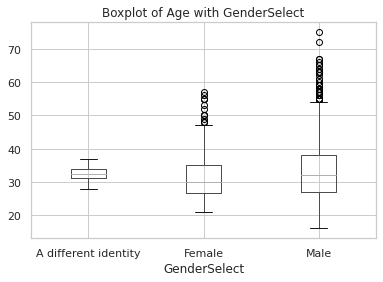

In [ ]:
df_demog_ds.boxplot(column='Age', by='GenderSelect')
plt.title("Boxplot of Age with GenderSelect")
plt.suptitle("")


<div class="alert alert-block alert-info">

**Code**: 
You are required to use the barchart to show the percentage of men, women and other identity.
    
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.B** In your report's section '1.3.B', include the bar chart generated from your code.
</div>
</div>

<BarContainer object of 3 artists>

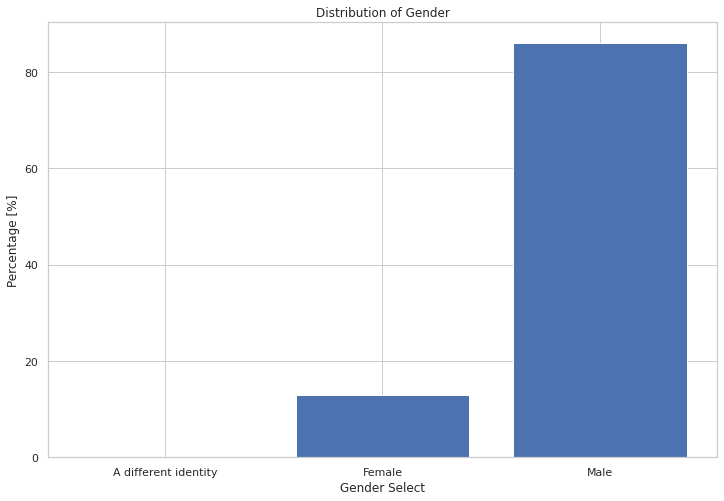

In [ ]:
# Your code
total = len(df_demog_ds)
df = pd.DataFrame({'percentage' : round(df_demog_ds.groupby(["GenderSelect"]).size()/total*100)}).reset_index()
plt.figure(figsize=(12,8))
plt.title('Distribution of Gender')
plt.xlabel('Gender Select')
plt.ylabel('Percentage [%]')
plt.bar(df['GenderSelect'], df['percentage'])
 

#### 1.3.3 Country
<a id="country"></a>
The data scientists are working all over the world. The United States is regarded the largest data science community. India, China and some other countries are also having a fast growing recently. Is this true? Let's find out.

<div class="alert alert-block alert-info">

**Code**: 
Find the top 5 countries of data scientists.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.C** In your report's section '1.3.C', answer what are those top 5 countries and their corresponding number of data scienists
</div>
</div>

In [ ]:
# Your Code: create and fill value into df_country
df_country = pd.DataFrame({'numberOfScientist' : df_demog_ds.groupby(["Country"]).size()}).nlargest(5, 'numberOfScientist').reset_index()
df_country


,Country,numberOfScientist
0,United States,414
1,India,111
2,France,60
3,United Kingdom,55
4,Germany,50


<BarContainer object of 5 artists>

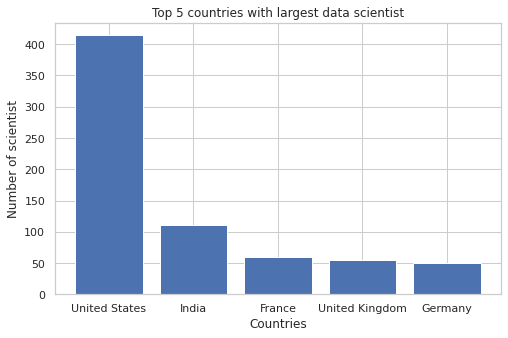

In [ ]:
# Bar plot Top 5 countries with largest data scientist
plt.figure(figsize=(8,5))
plt.title('Top 5 countries with largest data scientist')
plt.xlabel('Countries')
plt.ylabel('Number of scientist')
plt.bar(df_country['Country'], df_country['numberOfScientist'])

<div class="alert alert-block alert-info">

**Code**: 
Generate the distribution of top 5 countries of data scientists, using percentage barchart. You can not mannually input the name of top 5 countries (your code should not contain any name of the top 5 countries), and you are required to use python subset functions or many other functions.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.D** In your report's section '1.3.D', including the percentage barchart of those top 5 countries. Here the percentage is calculated based on all countries, not for those top 5 countries. So the sum of top 5 countries' percentage should be less than 1.
</div>
</div>

<BarContainer object of 5 artists>

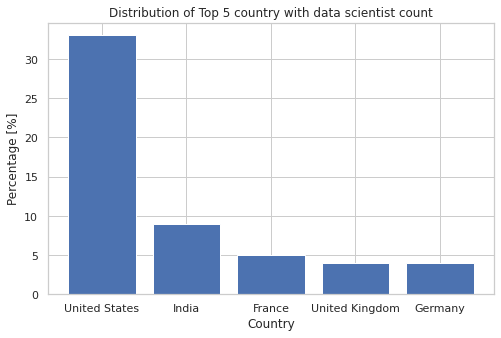

In [ ]:
#percentage
plt.figure(figsize=(8,5))
plt.title('Distribution of Top 5 country with data scientist count')
plt.xlabel('Country')
plt.ylabel('Percentage [%]')

#Your Code: create and fill values into df_country_top5
total_scientist = len(df_demog_ds)
df_country["percentage"] = round(df_country["numberOfScientist"]/total_scientist*100)
plt.bar(df_country['Country'], df_country['percentage'])

Now we have some understanding about the country, let's see if there is any relationship between country, age and gender.

<div class="alert alert-block alert-info">

**Code**: 
You are required to output the mean and median age for each gender for the United States, India, Australia, Pakistan


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.E** In your report's section '1.3.E', including the results of above coding task.
</div>
</div>




In [ ]:
# Your Code
countries = ['United States', 'India', 'Australia', 'Pakistan']
genders = df_demog_ds.GenderSelect.unique()
for i in range(0, 4):
  for gender in genders:
    ages = df_demog_ds[(df_demog_ds.Country == countries[i]) & (df_demog_ds.GenderSelect == gender)].Age
    if len(ages) > 0:
      print('Country: %s, Gender: %s, mean: %i, median: %i' % (countries[i], gender, ages.mean(), ages.median()))


Country: United States, Gender: Male, mean: 35, median: 33
Country: United States, Gender: Female, mean: 33, median: 31
Country: United States, Gender: A different identity, mean: 31, median: 31
Country: India, Gender: Male, mean: 30, median: 28
Country: India, Gender: Female, mean: 29, median: 27
Country: Australia, Gender: Male, mean: 35, median: 34
Country: Australia, Gender: Female, mean: 32, median: 31
Country: Pakistan, Gender: Male, mean: 32, median: 27


## Part 2 - Data Science Job Advertising Data

In this part, you are required to use the text processing skills to find out the insights in data science job adverising Data.

### 2.1. Load the data and Extract the high frequency words
<a id="text"></a>

Firstly, you will need to load the [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv) data and sub-set out of the job description from it.

In [ ]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain
#from tqdm import tqdm
import codecs
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt') # added this

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df_text = pd.read_csv('JobPostings.csv')

<div class="alert alert-block alert-info">

**Code**: 
You are required to extract the token and append them into the list 'token'.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.A** In your report's section '2.1.A', including your code of this task. You can copy and paster your completed code in the following cell
</div>
</div>


In [ ]:
lower = []
for item in df_text['job_description']:
    lower.append(item.lower())           # lowercase description
sentence = ' '.join(lower)

# Your code: write your code here to define your tokenize, and add to tokens 
tokens = nltk.word_tokenize(sentence)
print(tokens[:20])



['read', 'what', 'people', 'are', 'saying', 'about', 'working', 'here', '.', 'we', 'are', 'farmers', '!', 'join', 'a', 'team', 'of', 'diverse', 'professionals', 'at']


Secondly, 

<div class="alert alert-block alert-info">

**Code**: 
You are required to find out the words freqency which is more than 6000 in the job descriptions. (Please use stopwords at beginning)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.B** In your report's section '2.1.B', list those words with frequency > 6000.
</div>
</div>




In [ ]:
stop_words = set(stopwords.words('english')) 

freq6000 = []

# Your Code
# find top common words with document frequencies > 6000
# you may use function FreqDist() and sort()

# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]

# filter out stop words
words = [w for w in words if not w in stop_words]

fdist = FreqDist(words) 
freq6000 = list(filter(lambda x: x[1]>=6000,fdist.items()))

print ('There are %i' %len(freq6000))

freq6000


There are 92


[('people', 7445),
 ('working', 13281),
 ('team', 20747),
 ('skills', 19293),
 ('job', 12117),
 ('apply', 6081),
 ('knowledge', 12815),
 ('opportunities', 6034),
 ('world', 6602),
 ('data', 123388),
 ('scientist', 15969),
 ('science', 26505),
 ('provide', 7118),
 ('statistical', 14218),
 ('analysis', 20384),
 ('modeling', 10815),
 ('services', 7739),
 ('business', 33080),
 ('work', 27815),
 ('solutions', 14935),
 ('design', 8623),
 ('models', 16264),
 ('results', 6261),
 ('teams', 7824),
 ('etc', 7464),
 ('using', 12530),
 ('quantitative', 6382),
 ('build', 8115),
 ('tools', 12444),
 ('advanced', 10541),
 ('including', 10827),
 ('techniques', 11450),
 ('predictive', 7957),
 ('environment', 8475),
 ('requirements', 7904),
 ('degree', 11294),
 ('field', 7402),
 ('preferred', 7855),
 ('experience', 57883),
 ('analytics', 21438),
 ('role', 7257),
 ('required', 10868),
 ('r', 8541),
 ('python', 11356),
 ('sql', 7794),
 ('machine', 20033),
 ('learning', 26257),
 ('methods', 7037),
 ('managem

In [ ]:
freq6000

Then,

<div class="alert alert-block alert-info">

**Code**: 
You are required to sort and display the top 10 high frequency words in 'freq6000'

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.C** In your report's section '2.1.C', list those top 10 words
</div>
</div>






In [ ]:
# Your Code to sort and display the top 10 high fequency words in 'freq6000'
freq6000.sort(key = lambda x: x[1], reverse=True) 
freq6000[:10]


[('data', 123388),
 ('experience', 57883),
 ('business', 33080),
 ('work', 27815),
 ('science', 26505),
 ('learning', 26257),
 ('analytics', 21438),
 ('team', 20747),
 ('analysis', 20384),
 ('machine', 20033)]

Finally,

<div class="alert alert-block alert-info">

**Code**: 
You are required to carry out one more analytics on this data set, and implement it below.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.D** In your report's section '2.1.D', describe your self-defined text analysis task, and the discovery from your analysis.
</div>
</div>







In [ ]:
# Find dates
date_matches = re.findall("\d+/\d+/\d+", sentence) 
date_dict = {}
# Group the dates
for item in date_matches: 
  date_dict[item] = date_matches.count(item) 
sorted_date_count = sorted(date_dict.items(), key=lambda kv: kv[1], reverse=True) # order the result
sorted_date_count[:5] # get the first 5
    

[('08/30/2019', 4),
 ('01/02/2019', 3),
 ('1/1/1', 3),
 ('05/20/2019', 3),
 ('06/13/19', 3)]